In [ ]:
import pandas as pd

# Load the data
file_path = '/content/data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Random Forest


Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.77      0.81       316
    Enrolled       0.49      0.30      0.38       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885



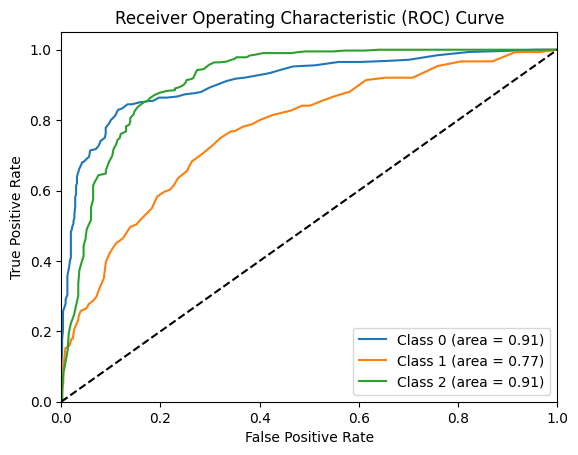

The predicted class using Random Forest is: Dropout


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the data
data = pd.read_csv('data.csv', delimiter=',')

# Handle missing values (if any)
data = data.dropna()

# Separate features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for Random Forest
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Feature scaling
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest
])

# Train the model
pipeline_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print('Classification Report:')
print(report)

# Binarize the output for ROC curve
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = pipeline_rf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Define a function to predict dropout based on user input
def predict_dropout(pipeline, label_encoder, feature_names, user_input):
    # Convert user input into a DataFrame
    input_data = pd.DataFrame([user_input], columns=feature_names)

    # Handle missing values in the input data
    input_data = pipeline.named_steps['imputer'].transform(input_data)

    # Scale the input data
    input_data = pipeline.named_steps['scaler'].transform(input_data)

    # Make a prediction
    prediction = pipeline.named_steps['clf'].predict(input_data)

    # Decode the prediction
    predicted_class = label_encoder.inverse_transform(prediction)[0]

    return predicted_class

# Example usage:
# Define the feature names and user input
feature_names = X.columns
user_input = {
    'Marital status': 1,
    'Application mode': 17,
    'Application order': 2,
    'Course': 9773,
    'Daytime/evening attendance': 1,
    'Previous qualification': 1,
    'Previous qualification (grade)': 122.0,
    'Nacionality': 1,
    'Mother\'s qualification': 38,
    'Father\'s qualification': 37,
    'Mother\'s occupation': 5,
    'Father\'s occupation': 3,
    'Admission grade': 119.6,
    'Displaced': 1,
    'Educational special needs': 0,
    'Debtor': 0,
    'Tuition fees up to date': 0,
    'Gender': 1,
    'Scholarship holder': 0,
    'Age at enrollment': 0,
    'International': 0,
    'Curricular units 1st sem (credited)': 0,
    'Curricular units 1st sem (enrolled)': 0,
    'Curricular units 1st sem (evaluations)': 0,
    'Curricular units 1st sem (approved)': 0,
    'Curricular units 1st sem (grade)': 0,
    'Curricular units 1st sem (without evaluations)': 0,
    'Curricular units 2nd sem (credited)': 0,
    'Curricular units 2nd sem (enrolled)': 0,
    'Curricular units 2nd sem (evaluations)': 0,
    'Curricular units 2nd sem (approved)': 0,
    'Curricular units 2nd sem (grade)': 0,
    'Curricular units 2nd sem (without evaluations)': 0,
    'Unemployment rate': 10.8,
    'Inflation rate': 1.4,
    'GDP': 1.74
}

# Predict dropout
predicted_class_rf = predict_dropout(pipeline_rf, label_encoder, feature_names, user_input)
print(f'The predicted class using Random Forest is: {predicted_class_rf}')


**KNN**

KNN Accuracy: 0.70
KNN Classification Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.68      0.74       316
    Enrolled       0.37      0.28      0.32       151
    Graduate       0.72      0.87      0.79       418

    accuracy                           0.70       885
   macro avg       0.63      0.61      0.62       885
weighted avg       0.69      0.70      0.69       885



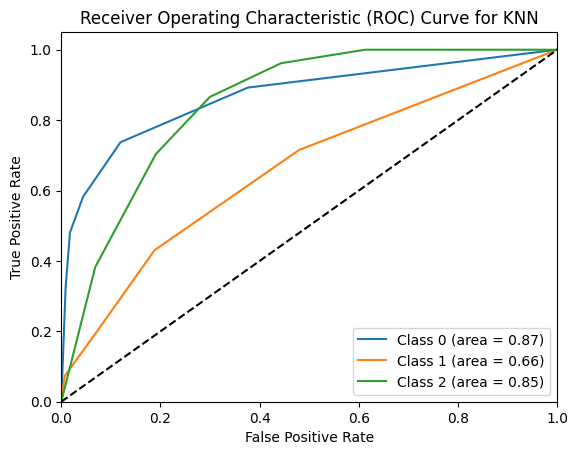

The predicted class using KNN is: Dropout


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the data
data = pd.read_csv('data.csv', delimiter=',')

# Handle missing values (if any)
data = data.dropna()

# Separate features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for KNN
pipeline_knn = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Feature scaling
    ('clf', KNeighborsClassifier(n_neighbors=5))  # KNN classifier
])

# Train the model
pipeline_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy:.2f}')

# Generate classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print('KNN Classification Report:')
print(report)

# Binarize the output for ROC curve
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = pipeline_knn.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='lower right')
plt.show()

# Define a function to predict dropout based on user input for KNN
def predict_dropout_knn(pipeline, label_encoder, feature_names, user_input):
    # Convert user input into a DataFrame
    input_data = pd.DataFrame([user_input], columns=feature_names)

    # Handle missing values in the input data
    input_data = pipeline.named_steps['imputer'].transform(input_data)

    # Scale the input data
    input_data = pipeline.named_steps['scaler'].transform(input_data)

    # Make a prediction
    prediction = pipeline.named_steps['clf'].predict(input_data)

    # Decode the prediction
    predicted_class = label_encoder.inverse_transform(prediction)[0]

    return predicted_class

# Example usage for KNN:
# Predict dropout for KNN
predicted_class_knn = predict_dropout_knn(pipeline_knn, label_encoder, feature_names, user_input)
print(f'The predicted class using KNN is: {predicted_class_knn}')


Logistic Regression

Logistic Regression Accuracy: 0.75
Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Dropout       0.83      0.77      0.80       316
    Enrolled       0.45      0.28      0.34       151
    Graduate       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885



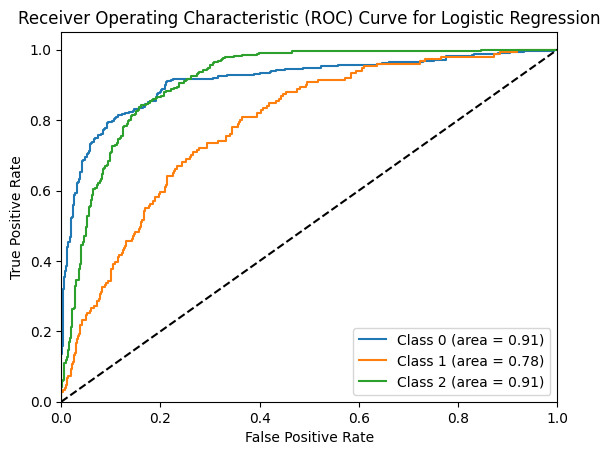

The predicted class using Logistic Regression is: Dropout


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the data
data = pd.read_csv('data.csv', delimiter=',')

# Handle missing values (if any)
data = data.dropna()

# Separate features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for Logistic Regression
pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Feature scaling
    ('clf', LogisticRegression(random_state=42))  # Logistic Regression classifier
])

# Train the model
pipeline_lr.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

# Generate classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print('Logistic Regression Classification Report:')
print(report)

# Binarize the output for ROC curve
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = pipeline_lr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Define a function to predict dropout based on user input for Logistic Regression
def predict_dropout_lr(pipeline, label_encoder, feature_names, user_input):
    # Convert user input into a DataFrame
    input_data = pd.DataFrame([user_input], columns=feature_names)

    # Handle missing values in the input data
    input_data = pipeline.named_steps['imputer'].transform(input_data)

    # Scale the input data
    input_data = pipeline.named_steps['scaler'].transform(input_data)

    # Make a prediction
    prediction = pipeline.named_steps['clf'].predict(input_data)

    # Decode the prediction
    predicted_class = label_encoder.inverse_transform(prediction)[0]

    return predicted_class

# Example usage for Logistic Regression:
# Define the feature names and user input
feature_names = X.columns
user_input = {
    'Marital status': 1,
    'Application mode': 17,
    'Application order': 2,
    'Course': 9773,
    'Daytime/evening attendance': 1,
    'Previous qualification': 1,
    'Previous qualification (grade)': 122.0,
    'Nacionality': 1,
    'Mother\'s qualification': 38,
    'Father\'s qualification': 37,
    'Mother\'s occupation': 5,
    'Father\'s occupation': 3,
    'Admission grade': 119.6,
    'Displaced': 1,
    'Educational special needs': 0,
    'Debtor': 0,
    'Tuition fees up to date': 0,
    'Gender': 1,
    'Scholarship holder': 0,
    'Age at enrollment': 0,
    'International': 0,
    'Curricular units 1st sem (credited)': 0,
    'Curricular units 1st sem (enrolled)': 0,
    'Curricular units 1st sem (evaluations)': 0,
    'Curricular units 1st sem (approved)': 0,
    'Curricular units 1st sem (grade)': 0,
    'Curricular units 1st sem (without evaluations)': 0,
    'Curricular units 2nd sem (credited)': 0,
    'Curricular units 2nd sem (enrolled)': 0,
    'Curricular units 2nd sem (evaluations)': 0,
    'Curricular units 2nd sem (approved)': 0,
    'Curricular units 2nd sem (grade)': 0,
    'Curricular units 2nd sem (without evaluations)': 0,
    'Unemployment rate': 10.8,
    'Inflation rate': 1.4,
    'GDP': 1.74
}

# Predict dropout for Logistic Regression
predicted_class_lr = predict_dropout_lr(pipeline_lr, label_encoder, feature_names, user_input)
print(f'The predicted class using Logistic Regression is: {predicted_class_lr}')


SVM

SVM Accuracy: 0.76
SVM Classification Report:
              precision    recall  f1-score   support

     Dropout       0.88      0.73      0.80       316
    Enrolled       0.48      0.32      0.38       151
    Graduate       0.75      0.94      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885



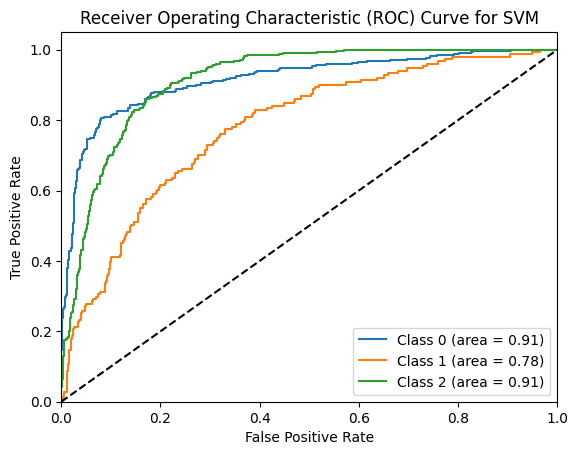

The predicted class using SVM is: Dropout


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the data
data = pd.read_csv('data.csv', delimiter=',')

# Handle missing values (if any)
data = data.dropna()

# Separate features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for SVM
pipeline_svm = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Feature scaling
    ('clf', SVC(probability=True, random_state=42))  # SVM classifier
])

# Train the model
pipeline_svm.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.2f}')

# Generate classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print('SVM Classification Report:')
print(report)

# Binarize the output for ROC curve
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = pipeline_svm.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.show()

# Define a function to predict dropout based on user input for SVM
def predict_dropout_svm(pipeline, label_encoder, feature_names, user_input):
    # Convert user input into a DataFrame
    input_data = pd.DataFrame([user_input], columns=feature_names)

    # Handle missing values in the input data
    input_data = pipeline.named_steps['imputer'].transform(input_data)

    # Scale the input data
    input_data = pipeline.named_steps['scaler'].transform(input_data)

    # Make a prediction
    prediction = pipeline.named_steps['clf'].predict(input_data)

    # Decode the prediction
    predicted_class = label_encoder.inverse_transform(prediction)[0]

    return predicted_class

# Example usage for SVM:
# Define the feature names and user input
feature_names = X.columns
user_input = {
    'Marital status': 1,
    'Application mode': 17,
    'Application order': 2,
    'Course': 9773,
    'Daytime/evening attendance': 1,
    'Previous qualification': 1,
    'Previous qualification (grade)': 122.0,
    'Nacionality': 1,
    'Mother\'s qualification': 38,
    'Father\'s qualification': 37,
    'Mother\'s occupation': 5,
    'Father\'s occupation': 3,
    'Admission grade': 119.6,
    'Displaced': 1,
    'Educational special needs': 0,
    'Debtor': 0,
    'Tuition fees up to date': 0,
    'Gender': 1,
    'Scholarship holder': 0,
    'Age at enrollment': 0,
    'International': 0,
    'Curricular units 1st sem (credited)': 0,
    'Curricular units 1st sem (enrolled)': 0,
    'Curricular units 1st sem (evaluations)': 0,
    'Curricular units 1st sem (approved)': 0,
    'Curricular units 1st sem (grade)': 0,
    'Curricular units 1st sem (without evaluations)': 0,
    'Curricular units 2nd sem (credited)': 0,
    'Curricular units 2nd sem (enrolled)': 0,
    'Curricular units 2nd sem (evaluations)': 0,
    'Curricular units 2nd sem (approved)': 0,
    'Curricular units 2nd sem (grade)': 0,
    'Curricular units 2nd sem (without evaluations)': 0,
    'Unemployment rate': 10.8,
    'Inflation rate': 1.4,
    'GDP': 1.74
}

# Predict dropout for SVM
predicted_class_svm = predict_dropout_svm(pipeline_svm, label_encoder, feature_names, user_input)
print(f'The predicted class using SVM is: {predicted_class_svm}')


DECISION TREE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the data
data = pd.read_csv('data.csv', delimiter=',')

# Handle missing values (if any)
data = data.dropna()

# Separate features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for Decision Tree Classifier
pipeline_dt = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),  # Feature scaling (not necessary for Decision Trees)
    ('clf', DecisionTreeClassifier(random_state=42))  # Decision Tree classifier
])

# Train the model
pipeline_dt.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.2f}')

# Generate classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print('Decision Tree Classification Report:')
print(report)

# Binarize the output for ROC curve (Decision Trees do not have predict_proba)
y_test_binarized = label_binarize(y_test, classes=label_encoder.classes_)

# Define a function to predict dropout based on user input for Decision Tree
def predict_dropout_dt(pipeline, label_encoder, feature_names, user_input):
    # Convert user input into a DataFrame
    input_data = pd.DataFrame([user_input], columns=feature_names)

    # Handle missing values in the input data
    input_data = pipeline.named_steps['imputer'].transform(input_data)

    # Make a prediction
    prediction = pipeline.named_steps['clf'].predict(input_data)

    # Decode the prediction
    predicted_class = label_encoder.inverse_transform(prediction)[0]

    return predicted_class

# Example usage for Decision Tree:
# Define the feature names and user input
feature_names = X.columns
user_input = {
    'Marital status': 1,
    'Application mode': 17,
    'Application order': 2,
    'Course': 9773,
    'Daytime/evening attendance': 1,
    'Previous qualification': 1,
    'Previous qualification (grade)': 122.0,
    'Nacionality': 1,
    'Mother\'s qualification': 38,
    'Father\'s qualification': 37,
    'Mother\'s occupation': 5,
    'Father\'s occupation': 3,
    'Admission grade': 119.6,
    'Displaced': 1,
    'Educational special needs': 0,
    'Debtor': 0,
    'Tuition fees up to date': 0,
    'Gender': 1,
    'Scholarship holder': 0,
    'Age at enrollment': 0,
    'International': 0,
    'Curricular units 1st sem (credited)': 0,
    'Curricular units 1st sem (enrolled)': 0,
    'Curricular units 1st sem (evaluations)': 0,
    'Curricular units 1st sem (approved)': 0,
    'Curricular units 1st sem (grade)': 0,
    'Curricular units 1st sem (without evaluations)': 0,
    'Curricular units 2nd sem (credited)': 0,
    'Curricular units 2nd sem (enrolled)': 0,
    'Curricular units 2nd sem (evaluations)': 0,
    'Curricular units 2nd sem (approved)': 0,
    'Curricular units 2nd sem (grade)': 0,
    'Curricular units 2nd sem (without evaluations)': 0,
    'Unemployment rate': 10.8,
    'Inflation rate': 1.4,
    'GDP': 1.74
}

# Predict dropout for Decision Tree
predicted_class_dt = predict_dropout_dt(pipeline_dt, label_encoder, feature_names, user_input)
print(f'The predicted class using Decision Tree is: {predicted_class_dt}')


Decision Tree Accuracy: 0.68
Decision Tree Classification Report:
              precision    recall  f1-score   support

     Dropout       0.72      0.64      0.68       316
    Enrolled       0.36      0.40      0.38       151
    Graduate       0.77      0.80      0.79       418

    accuracy                           0.68       885
   macro avg       0.62      0.61      0.61       885
weighted avg       0.68      0.68      0.68       885

The predicted class using Decision Tree is: Dropout


 Since Decision Trees don't have predict_proba, we cannot directly plot ROC curve.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('data.csv', delimiter=',')

# Handle missing values (if any)
data = data.dropna()

# Separate features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create and evaluate a pipeline
def evaluate_model(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create pipelines for each model
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_knn = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

pipeline_svm = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])

pipeline_dt = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Evaluate each model
accuracy_rf = evaluate_model(pipeline_rf, X_train, X_test, y_train, y_test)
accuracy_knn = evaluate_model(pipeline_knn, X_train, X_test, y_train, y_test)
accuracy_lr = evaluate_model(pipeline_lr, X_train, X_test, y_train, y_test)
accuracy_svm = evaluate_model(pipeline_svm, X_train, X_test, y_train, y_test)
accuracy_dt = evaluate_model(pipeline_dt, X_train, X_test, y_train, y_test)

# Print the accuracy of each model
print(f'Accuracy of Random Forest: {accuracy_rf:.4f}')
print(f'Accuracy of K-Nearest Neighbors: {accuracy_knn:.4f}')
print(f'Accuracy of Logistic Regression: {accuracy_lr:.4f}')
print(f'Accuracy of SVM: {accuracy_svm:.4f}')
print(f'Accuracy of Decision Tree: {accuracy_dt:.4f}')


Accuracy of Random Forest: 0.7616
Accuracy of K-Nearest Neighbors: 0.7017
Accuracy of Logistic Regression: 0.7525
Accuracy of SVM: 0.7582
Accuracy of Decision Tree: 0.6768


Random forest has higher accuracy

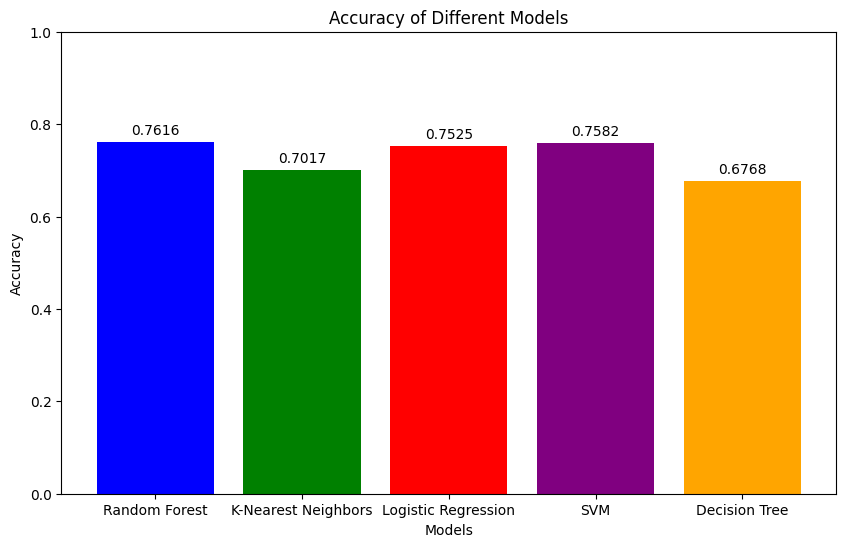

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have computed accuracies for all models
model_names = ['Random Forest', 'K-Nearest Neighbors', 'Logistic Regression', 'SVM', 'Decision Tree']
accuracies = [accuracy_rf, accuracy_knn, accuracy_lr, accuracy_svm, accuracy_dt]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1

# Adding text labels for each bar
for bar, accuracy in zip(bars, accuracies):
    yval = accuracy + 0.01  # Adjust position of the text slightly above the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()
